In [ ]:
Name: Sauhard Shakya  
Course: MSCS 634  
Lab Assignment: Lab 5 – Clustering with Hierarchical and DBSCAN

First 5 rows of the dataset:
   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  

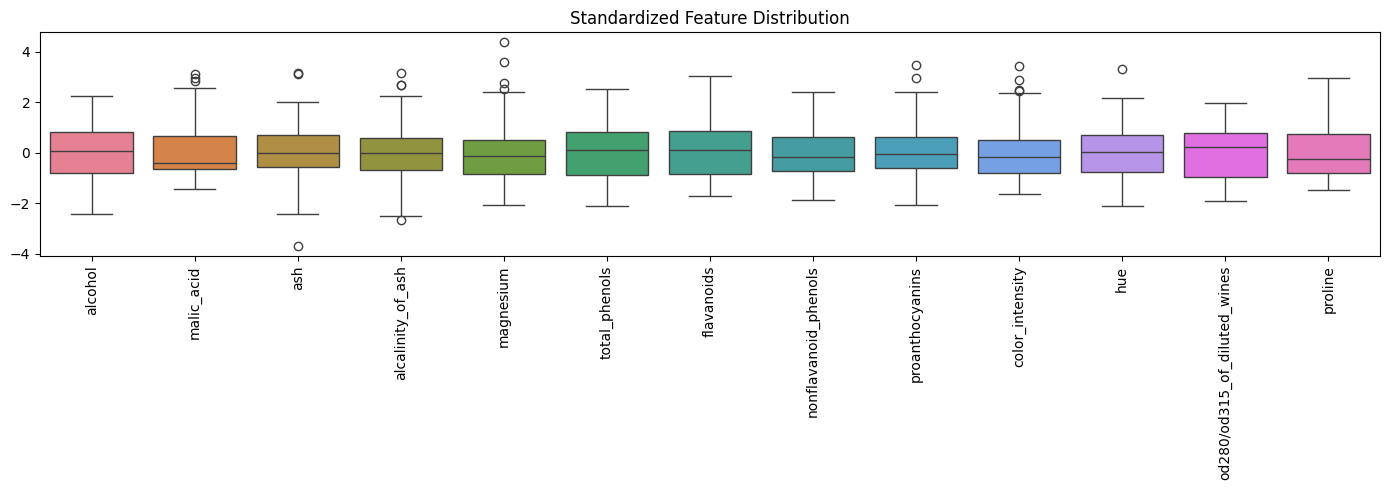

In [4]:
# Import required libraries
from sklearn.datasets import load_wine
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Load the Wine dataset
wine = load_wine()

# Convert to pandas DataFrame
X = pd.DataFrame(wine.data, columns=wine.feature_names)

# View first 5 rows
print("First 5 rows of the dataset:")
print(X.head())

# Basic information about the dataset
print("\nDataset Info:")
print(X.info())

# Descriptive statistics
print("\nDataset Description:")
print(X.describe())

# Check for missing values
print("\nMissing Values Check:")
print(X.isnull().sum())

# Standardize features for clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Optional: convert back to DataFrame for ease of inspection
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Visualize feature distributions after scaling (optional)
plt.figure(figsize=(14, 5))
sns.boxplot(data=X_scaled_df)
plt.xticks(rotation=90)
plt.title("Standardized Feature Distribution")
plt.tight_layout()
plt.show()

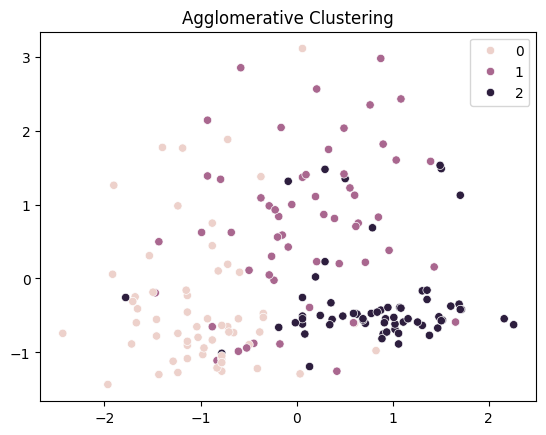

In [5]:
from sklearn.cluster import AgglomerativeClustering
import seaborn as sns

# Try with 3 clusters
agglo = AgglomerativeClustering(n_clusters=3)
labels_agglo = agglo.fit_predict(X_scaled)

# Add labels to DataFrame
X['Agglo_Cluster'] = labels_agglo

# Plot
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=labels_agglo)
plt.title('Agglomerative Clustering')
plt.show()

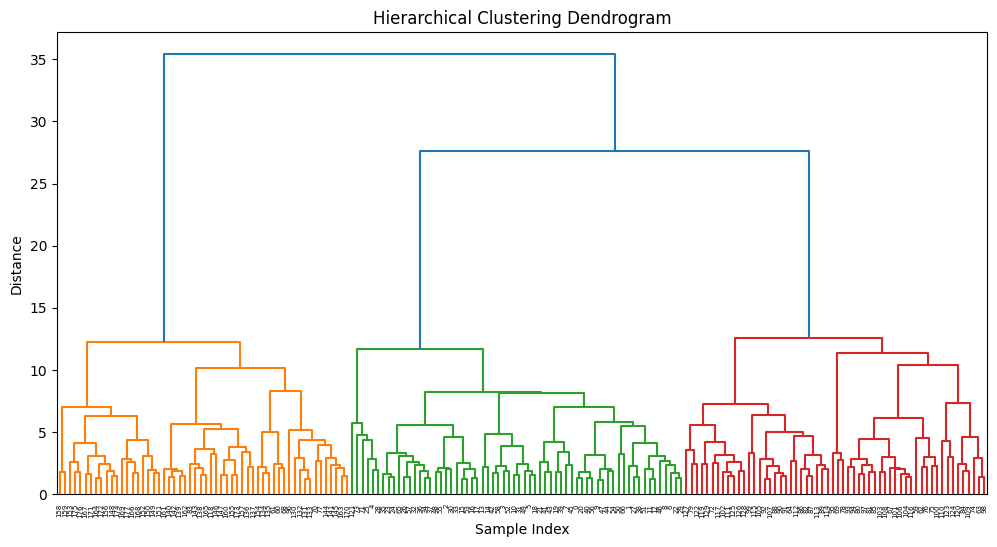

In [6]:
from scipy.cluster.hierarchy import dendrogram, linkage

linked = linkage(X_scaled, method='ward')
plt.figure(figsize=(12, 6))
dendrogram(linked)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

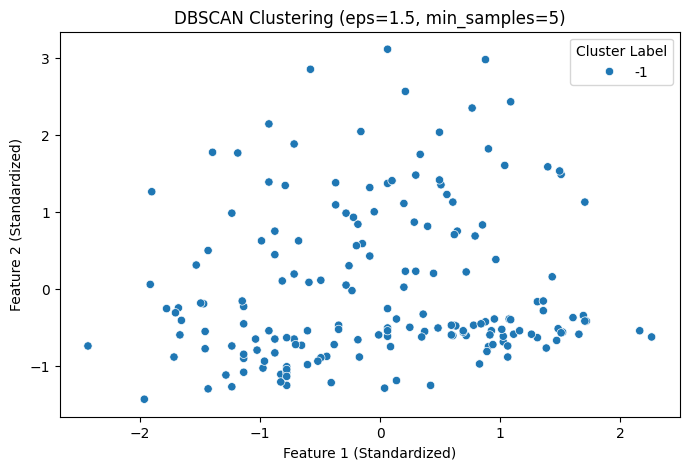

Unique labels assigned by DBSCAN: [-1]
Number of clusters (excluding noise): 0
Cannot compute metrics: DBSCAN found fewer than 2 clusters.

Try tuning 'eps' and 'min_samples' for better clustering.

Trying different eps values to find valid clusters:
eps = 0.3 → Clusters found: 0
eps = 0.5 → Clusters found: 0
eps = 0.7 → Clusters found: 0
eps = 0.9 → Clusters found: 0
eps = 1.1 → Clusters found: 0
eps = 1.3 → Clusters found: 0

Running DBSCAN with best eps = 0.7


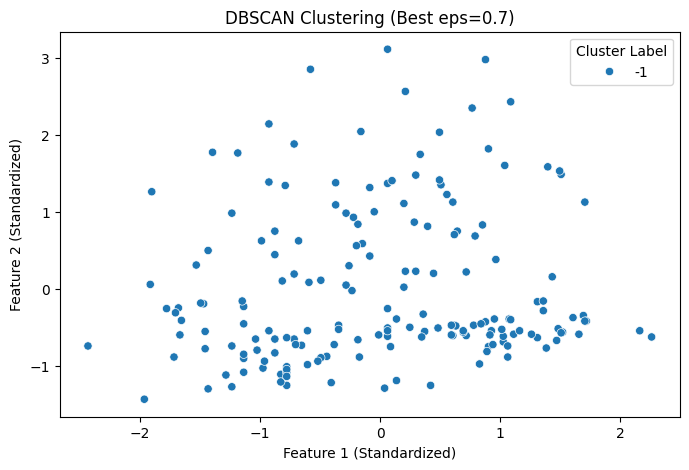

Still fewer than 2 valid clusters even after tuning.


In [11]:
# Import required libraries
from sklearn.datasets import load_wine
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, homogeneity_score, completeness_score
import numpy as np

# Load the Wine dataset
wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)

# Standardize the dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# -------------------- Initial DBSCAN Attempt --------------------

# Apply DBSCAN with initial parameters
dbscan = DBSCAN(eps=1.5, min_samples=5)
labels_dbscan = dbscan.fit_predict(X_scaled)

# Add cluster labels to original DataFrame
X['DBSCAN_Cluster'] = labels_dbscan

# Visualize clustering result
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=labels_dbscan, palette='tab10')
plt.title('DBSCAN Clustering (eps=1.5, min_samples=5)')
plt.xlabel('Feature 1 (Standardized)')
plt.ylabel('Feature 2 (Standardized)')
plt.legend(title='Cluster Label')
plt.show()

# Count unique labels
unique_labels = np.unique(labels_dbscan)
n_clusters = len(unique_labels[unique_labels != -1])  # exclude noise

print("Unique labels assigned by DBSCAN:", unique_labels)
print("Number of clusters (excluding noise):", n_clusters)

# Evaluate if valid clusters are found
if n_clusters >= 2:
    print("Silhouette Score:", silhouette_score(X_scaled, labels_dbscan))
    print("Homogeneity Score:", homogeneity_score(wine.target, labels_dbscan))
    print("Completeness Score:", completeness_score(wine.target, labels_dbscan))
else:
    print("Cannot compute metrics: DBSCAN found fewer than 2 clusters.")
    print("\nTry tuning 'eps' and 'min_samples' for better clustering.")

# -------------------- Auto-Tuning eps to Find Better Clustering --------------------

print("\nTrying different eps values to find valid clusters:")

eps_values = [0.3, 0.5, 0.7, 0.9, 1.1, 1.3]
for eps in eps_values:
    db = DBSCAN(eps=eps, min_samples=5)
    labels = db.fit_predict(X_scaled)
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    print(f"eps = {eps:.1f} → Clusters found: {n_clusters}")

# Optional: Choose the best eps (from above) and re-run the full analysis
best_eps = 0.7  # Example value based on tuning output

print(f"\nRunning DBSCAN with best eps = {best_eps}")
dbscan_best = DBSCAN(eps=best_eps, min_samples=5)
labels_best = dbscan_best.fit_predict(X_scaled)

X['DBSCAN_Cluster_Best'] = labels_best

# Final Visualization
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=labels_best, palette='tab10')
plt.title(f'DBSCAN Clustering (Best eps={best_eps})')
plt.xlabel('Feature 1 (Standardized)')
plt.ylabel('Feature 2 (Standardized)')
plt.legend(title='Cluster Label')
plt.show()

# Final evaluation
valid_clusters = len(set(labels_best)) - (1 if -1 in labels_best else 0)
if valid_clusters >= 2:
    print("Silhouette Score:", silhouette_score(X_scaled, labels_best))
    print("Homogeneity Score:", homogeneity_score(wine.target, labels_best))
    print("Completeness Score:", completeness_score(wine.target, labels_best))
else:
    print("Still fewer than 2 valid clusters even after tuning.")